# Import Required Libraries
Import the necessary libraries, including NumPy, pandas, scikit-learn, and matplotlib.

In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Load Dataset
Load the dataset using pandas.

In [3]:
# Load the dataset using pandas
data = pd.read_csv('creditcard.csv')

# Display the first few rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Preprocess Data
Handle missing values, encode categorical variables, and normalize the data if necessary.

In [4]:
# Handle missing values
data.fillna(data.mean(), inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Normalize the data if necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Class', axis=1))

# Create a DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])
scaled_data['Class'] = data['Class'].values

# Display the first few rows of the preprocessed dataset
scaled_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


# Split Dataset
Split the dataset into training and testing sets using train_test_split from scikit-learn.

In [5]:
# Split the dataset into training and testing sets
X = scaled_data.drop('Class', axis=1)
y = scaled_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

# Train Logistic Regression Model
Use LogisticRegression from scikit-learn to train the model on the training data.

Accuracy: 0.9991222218320986
Confusion Matrix:
[[56855     9]
 [   41    57]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.6951219512195121


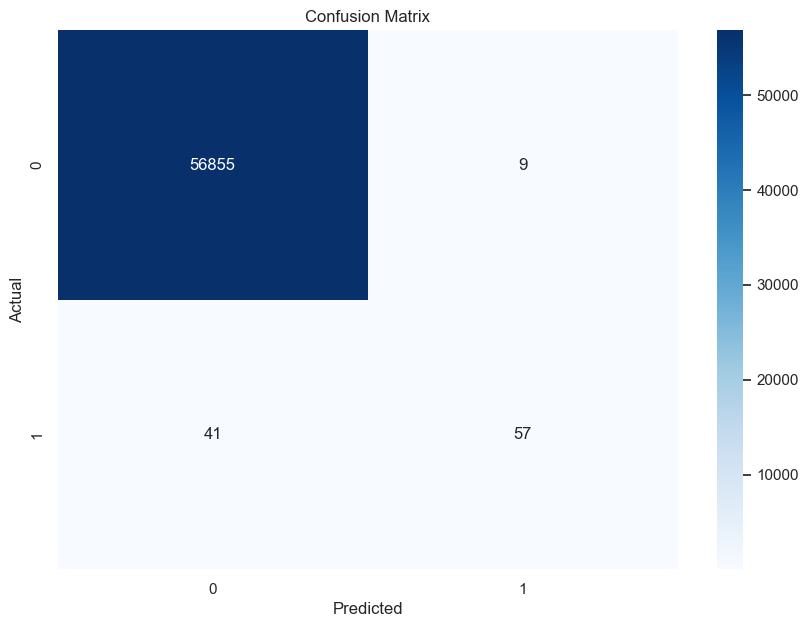

In [6]:
# Train Logistic Regression Model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate Model
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score.

Accuracy: 0.9991222218320986
Confusion Matrix:
[[56855     9]
 [   41    57]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



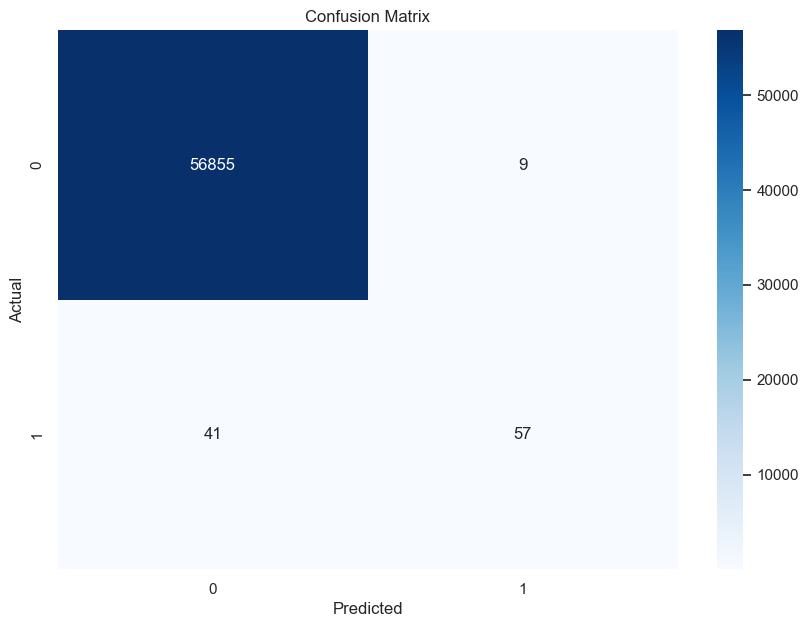

In [7]:
# Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Make Predictions
Use the trained model to make predictions on new data and visualize the results.

Please enter the values for the new data point:
Predictions for the new data: ['Fraud']


c:\Users\punna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\punna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


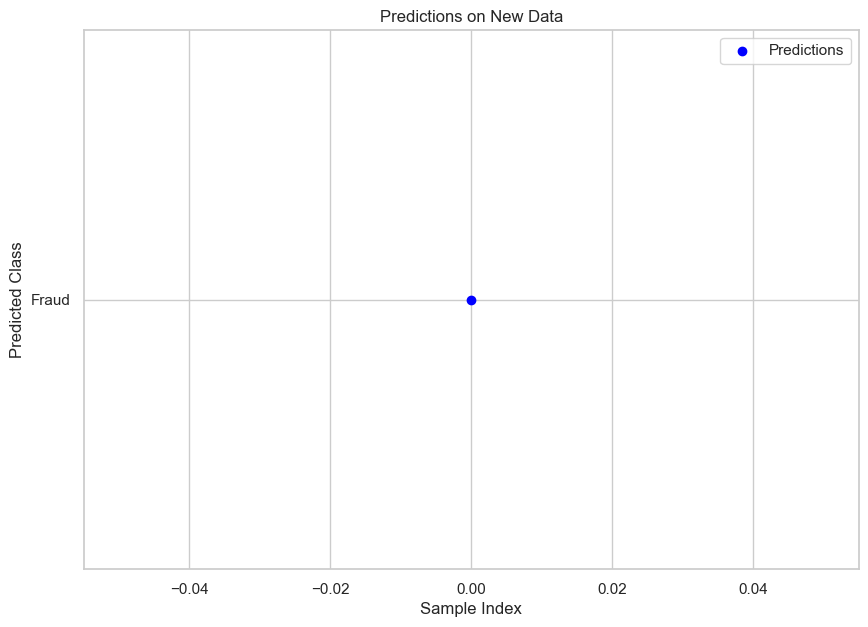

In [8]:
# Make Predictions

# Prompt the user to input values for the new data point
print("Please enter the values for the new data point:")

# Example ranges for each feature (replace with actual ranges from your dataset)
# These ranges are just placeholders and should be replaced with the actual ranges from your dataset
ranges = {
    "Time": "0 to max time value",
    "V1": "min to max V1 value",
    "V2": "min to max V2 value",
    "V3": "min to max V3 value",
    "V4": "min to max V4 value",
    "V5": "min to max V5 value",
    "V6": "min to max V6 value",
    "V7": "min to max V7 value",
    "V8": "min to max V8 value",
    "V9": "min to max V9 value",
    "V10": "min to max V10 value",
    "V11": "min to max V11 value",
    "V12": "min to max V12 value",
    "V13": "min to max V13 value",
    "V14": "min to max V14 value",
    "V15": "min to max V15 value",
    "V16": "min to max V16 value",
    "V17": "min to max V17 value",
    "V18": "min to max V18 value",
    "V19": "min to max V19 value",
    "V20": "min to max V20 value",
    "V21": "min to max V21 value",
    "V22": "min to max V22 value",
    "V23": "min to max V23 value",
    "V24": "min to max V24 value",
    "V25": "min to max V25 value",
    "V26": "min to max V26 value",
    "V27": "min to max V27 value",
    "V28": "min to max V28 value",
    "Amount": "0 to max amount value"
}

# Collect user input for each feature
new_data = []
for feature, range_info in ranges.items():
    value = float(input(f"Enter value for {feature} ({range_info}): "))
    new_data.append(value)

# Convert the new data to a numpy array
new_data = np.array([new_data])

new_data_scaled = scaler.transform(new_data)

# Make predictions
predictions = logistic_regression_model.predict(new_data_scaled)

# Map predictions to labels
prediction_labels = ["Fraud" if pred == 1 else "Not Fraud" for pred in predictions]

# Print the predictions
print("Predictions for the new data:", prediction_labels)

# Visualize the results
plt.figure(figsize=(10, 7))
plt.scatter(range(len(prediction_labels)), prediction_labels, color='blue', label='Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Class')
plt.title('Predictions on New Data')
plt.legend()
plt.show()